In [35]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pickle
import numpy as np

font = {'family' : 'calibri',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

#f = open('driftExplorerNoBombDurGrid.pickle', 'rb')
f = open('Poster4Tests.pickle', 'rb')
data = pickle.load(f)
f.close()

In [36]:
print(data['var'])
print()
for i in range(len(data['order'])):
    print(str(i) + ' ' + data['order'][i])
print()
#for key in data['data'][list(data['data'].keys())[0]].keys():
#    print(key)

{'localRecluster': [0, 1, 2], 'GRIncrement': [1, 1.5], 'clusteringOn': ['false', 'true'], 'globalRecluster': [0, 1, 3], 'GRDecrement': [0.7, 0.75, 1], 'aloneThreshold': [0.03, 0.1], 'aloneClusterSearch': ['false', 'true']}

0 clusteringOn
1 aloneThreshold
2 GRDecrement
3 aloneClusterSearch
4 GRIncrement
5 globalRecluster
6 localRecluster



In [37]:
inputDict = {'globalRecluster':'GR', 'reclusterThreshold': 'GR Thresh', 'clusteringOn':'Cluster', 'localRecluster':'LR',
             'clusterSearchThresh':'CS', 'CHBatteryDropThresh':'Battery Thresh', 'CHTimeThresh':'Time Thresh'}
paramDict = {'globalRecluster':{'0':'Off', '1':'On', '3':'On w/ Period'}, 'clusteringOn':{'true':'On', 'false':'Off'},
             'localRecluster':{'0':'Off', '1':'Minimal', '2':'On', '3':'Expansive', '63':'Expansive'}}

In [38]:
i = 0
print(len(data['data'].keys()))

19


In [58]:
def compareOverTime(compare, keyInds, ignoreDicts=[]):
    stats = {}
    counts = {}
    minArrLen = 10000000
    ignore = False
    for key in data['data'].keys():
        for iDict in ignoreDicts:
            count = 0
            for ind in iDict:
                for ignoreKey in iDict[ind]:
                    if key[ind] == ignoreKey:
                        count += 1
            if count == len(iDict):
                ignore = True
        if not ignore:
            run = data['data'][key]
            keyStrs = []
            for ind in keyInds:
                keyStrs += [str(key[ind])]
            statsKey = '-'.join(keyStrs)
            arr = run[compare]
            minArrLen = min(minArrLen, len(arr))
            if statsKey in stats.keys():
                for i in range(minArrLen):
                    stats[statsKey][i] += arr[i]
                counts[statsKey] += 1
            else:
                stats[statsKey] = []
                for i in range(minArrLen):
                    stats[statsKey] += [arr[i]]
                counts[statsKey] = 1
        else:
            ignore = False
    for key in stats.keys():
        for i in range(minArrLen):
            stats[key][i] = stats[key][i]/counts[key]
    stats['compare'] = compare
    stats['minArrLen'] = minArrLen
    stats['keyInds'] = keyInds
    stats['ignore'] = ignoreDicts
    return stats

In [59]:
def generateOverTimeGraphsHelper(keyInds, stats, x, separationLevel, currentLevel, strArr, titleArr, highX, topY, xTicks, yTicks):
    legendTitle = ''
    if currentLevel < len(keyInds):
        currentKey = data['order'][keyInds[currentLevel]]
        for var in data['var'][currentKey]:
            if not (currentKey in stats['ignore'] and stats['ignore'][currentKey] == var):
                legendTitle = generateOverTimeGraphsHelper(keyInds, stats, x, separationLevel, currentLevel + 1, strArr + [str(var)], titleArr + [str(currentKey)], highX, topY, xTicks, yTicks)
    else:
        key = '-'.join(strArr)
        if key in stats.keys():
            y = stats[key]
            label = ''
            for i in range(currentLevel-separationLevel):
                if titleArr[i] in inputDict:
                    if titleArr[i] in paramDict:
                        label += inputDict[titleArr[i]] + ': ' + paramDict[titleArr[i]][strArr[i]] + '  '
                    else:
                        label += inputDict[titleArr[i]] + ': ' + strArr[i] + '  '
                else:
                    label += titleArr[i] + ': ' + strArr[i] + '  '
            if 'Cluster: Off  ' in label:
                label = 'Cluster: Off  '
            elif 'Cluster: On  ' in label:
                label = label.replace('Cluster: On  ', '')
            label = label[:len(label)-2]
            #label = '-'.join(strArr[separationLevel:])
            plt.plot(x, y, label=label, linewidth=3)
            #legendTitle = '-'.join(titleArr[separationLevel:])
    if currentLevel == separationLevel:
        title = ''
        if len(titleArr) > 0:
            title = '-'.join(titleArr) + ': '
            title += '-'.join(strArr)
        plt.xlabel('Time (s)')
        plt.ylabel(stats['compare'])
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=legendTitle)
        #plt.legend(title=legendTitle)
        bottom, top = plt.ylim()
        low, high = plt.xlim()
        if topY != 0:
            plt.ylim(bottom, topY)
        if highX != 0:
            plt.xlim(low, highX)
        if xTicks == []:
            plt.autoscale(axis='x')
        else:
            plt.xticks(xTicks)
        if yTicks == []:
            plt.autoscale(axis='y')
        else:
            plt.yticks(yTicks)
        plt.title(title)
        plt.show()
    return legendTitle

def generateOverTimeGraphs(stats, separationLevel=0, highX=0, topY=0, xTicks=[], yTicks=[]):
    generateOverTimeGraphsHelper(stats['keyInds'], stats, [i for i in range(stats['minArrLen'])], separationLevel, 0, [], [], highX, topY, xTicks, yTicks)

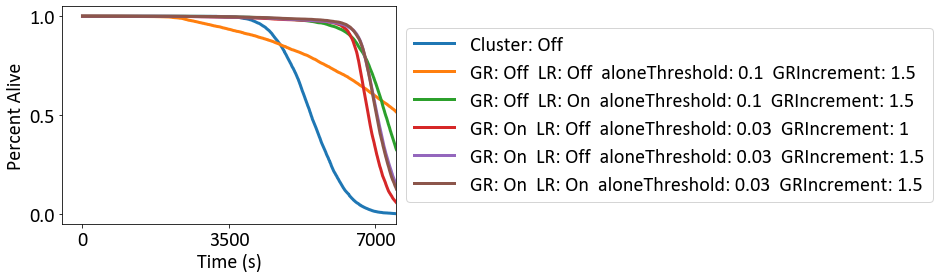

In [95]:
Alive = compareOverTime('Percent Alive', [0,5,6,1,4], [{1:[0.1], 5:[1,3], 0:['true']}, {5:[3], 1:[0.03]}, {6:[2],4:[1]}])
generateOverTimeGraphs(Alive, 0, xTicks=[0, 3500, 7000], yTicks=[0,0.5,1], highX=7500)

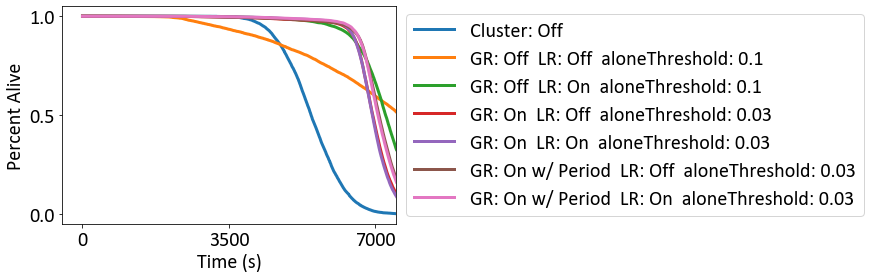

In [97]:
Alive = compareOverTime('Percent Alive', [0,5,6,1], [{1:[0.1], 5:[1,3], 0:['true']}])
generateOverTimeGraphs(Alive, 0, xTicks=[0, 3500, 7000], yTicks=[0,0.5,1], highX=7500)

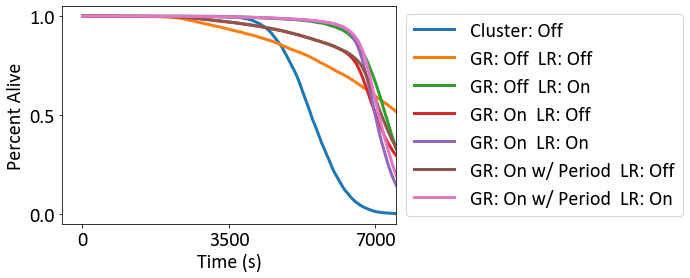

In [45]:
Alive = compareOverTime('Percent Alive', [0,5,6], {})
generateOverTimeGraphs(Alive, 0, xTicks=[0, 3500, 7000], yTicks=[0,0.5,1], highX=7500)

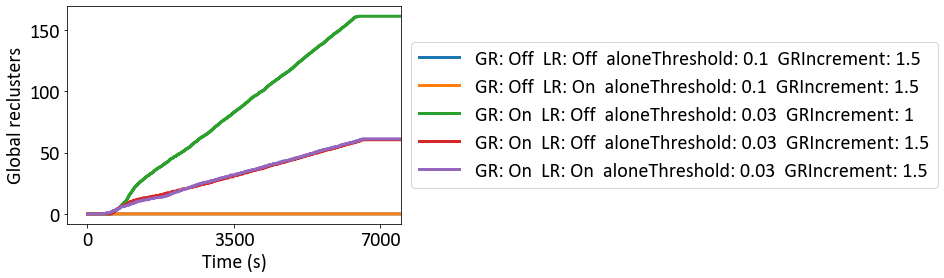

In [99]:
Alive = compareOverTime('Global reclusters', [0,5,6,1,4], [{0:['false']}, {1:[0.1], 5:[1,3], 0:['true']}, {5:[3], 1:[0.03]}, {6:[2],4:[1]}])
generateOverTimeGraphs(Alive, 0, xTicks=[0, 3500, 7000], highX=7500)

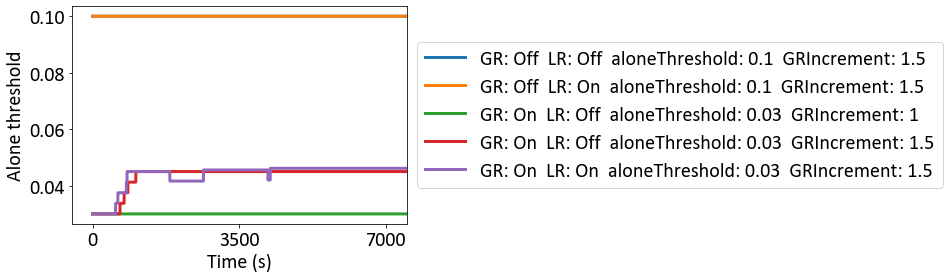

In [100]:
Alive = compareOverTime('Alone threshold', [0,5,6,1,4], [{0:['false']}, {1:[0.1], 5:[1,3], 0:['true']}, {5:[3], 1:[0.03]}, {6:[2],4:[1]}])
generateOverTimeGraphs(Alive, 0, xTicks=[0, 3500, 7000], highX=7500)

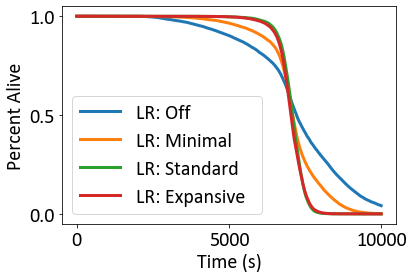

In [65]:
Alive = compareOverTime('Percent Alive', [2], {1:['false'], 0:[2]})
generateOverTimeGraphs(Alive, 0, xTicks=[0, 5000, 10000], yTicks=[0,0.5,1])

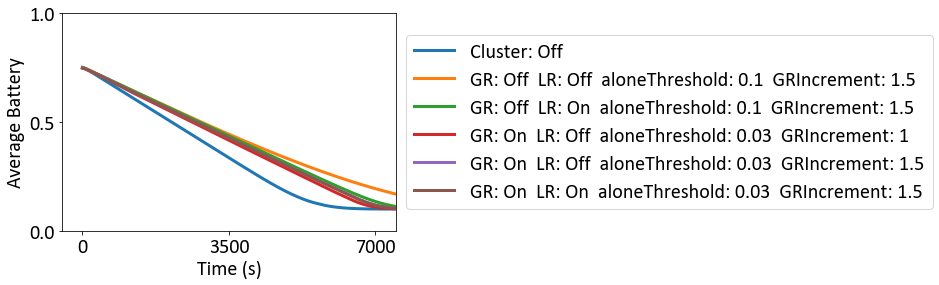

In [101]:
Alive = compareOverTime('Average Battery', [0,5,6,1,4], [{1:[0.1], 5:[1,3], 0:['true']}, {5:[3], 1:[0.03]}, {6:[2],4:[1]}])
generateOverTimeGraphs(Alive, 0, xTicks=[0, 3500, 7000], yTicks=[0,0.5,1], highX=7500)

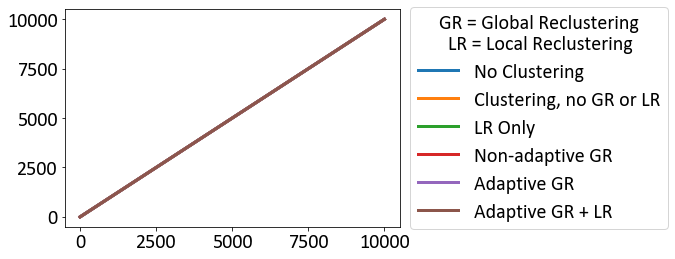

In [102]:
x = range(10000)
y = range(10000)

plt.plot(x, y, label="No Clustering", linewidth=3)
plt.plot(x, y, label="Clustering, no GR or LR", linewidth=3)
plt.plot(x, y, label="LR Only", linewidth=3)
plt.plot(x, y, label="Non-adaptive GR", linewidth=3)
plt.plot(x, y, label="Adaptive GR", linewidth=3)
plt.plot(x, y, label="Adaptive GR + LR", linewidth=3)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="GR = Global Reclustering\n  LR = Local Reclustering")
plt.show()

In [73]:
def compareOverTimeMultiply(compare, keyInds, ignoreDict={}):
    stats = {}
    counts = {}
    minArrLen = 10000000
    ignore = False
    for key in data['data'].keys():
        for ind in ignoreDict:
            for ignoreKey in ignoreDict[ind]:
                if key[ind] == ignoreKey:
                    ignore = True
        if not ignore:
            run = data['data'][key]
            keyStrs = []
            for ind in keyInds:
                keyStrs += [str(key[ind])]
            statsKey = '-'.join(keyStrs)
            arr = []
            for dat in compare:
                if len(arr) > 0:
                    for i in range(len(run[dat])):
                        arr[i] *= run[dat][i] 
                else:
                    arr = run[dat][:]
            minArrLen = min(minArrLen, len(arr))
            if statsKey in stats.keys():
                for i in range(minArrLen):
                    stats[statsKey][i] += arr[i]
                counts[statsKey] += 1
            else:
                stats[statsKey] = []
                for i in range(minArrLen):
                    stats[statsKey] += [arr[i]]
                counts[statsKey] = 1
        else:
            ignore = False
    for key in stats.keys():
        for i in range(minArrLen):
            stats[key][i] = stats[key][i]/counts[key]
    compareStr = '  x  '.join(compare)
    stats['compare'] = compareStr
    stats['minArrLen'] = minArrLen
    stats['keyInds'] = keyInds
    stats['ignore'] = ignoreDict
    return stats

In [80]:
def compareOverTimeAdd(compare, keyInds, ignoreDicts={}):
    stats = {}
    counts = {}
    minArrLen = 10000000
    ignore = False
    for key in data['data'].keys():
        for iDict in ignoreDicts:
            count = 0
            for ind in iDict:
                for ignoreKey in iDict[ind]:
                    if key[ind] == ignoreKey:
                        count += 1
            if count == len(iDict):
                ignore = True
        if not ignore:
            run = data['data'][key]
            keyStrs = []
            for ind in keyInds:
                keyStrs += [str(key[ind])]
            statsKey = '-'.join(keyStrs)
            arr = []
            for dat in compare:
                if len(arr) > 0:
                    for i in range(len(run[dat])):
                        arr[i] += run[dat][i]*compare[dat]
                else:
                    for i in range(len(run[dat])):
                        arr += [run[dat][i]*compare[dat]]
            minArrLen = min(minArrLen, len(arr))
            if statsKey in stats.keys():
                for i in range(minArrLen):
                    stats[statsKey][i] += arr[i]
                counts[statsKey] += 1
            else:
                stats[statsKey] = []
                for i in range(minArrLen):
                    stats[statsKey] += [arr[i]]
                counts[statsKey] = 1
        else:
            ignore = False
    for key in stats.keys():
        for i in range(minArrLen):
            stats[key][i] = stats[key][i]/counts[key]
    cmpStrs = []
    for dat in compare:
        if compare[dat] != 1:
            cmpStrs += [dat + ' x ' + str(compare[dat])]
        else:
            cmpStrs += [dat]
    compareStr = '  +  '.join(cmpStrs)
    stats['compare'] = compareStr
    stats['minArrLen'] = minArrLen
    stats['keyInds'] = keyInds
    stats['ignore'] = ignoreDicts
    return stats

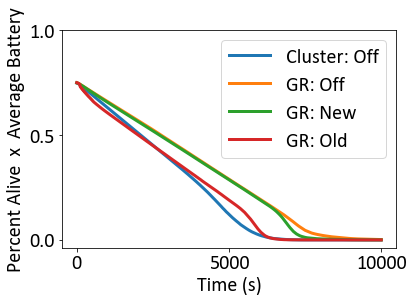

In [98]:
Alive = compareOverTimeMultiply(['Percent Alive', 'Average Battery'], [1,0], {})
generateOverTimeGraphs(Alive, 0, xTicks=[0, 5000, 10000], yTicks=[0,0.5,1])

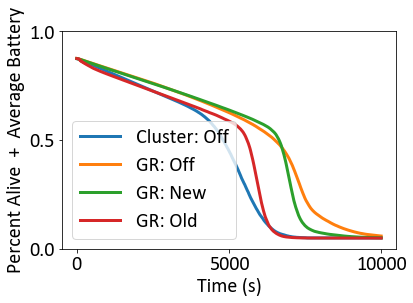

In [101]:
Alive = compareOverTimeAdd(['Percent Alive', 'Average Battery'], [1,0], {})
generateOverTimeGraphs(Alive, 0, xTicks=[0, 5000, 10000], yTicks=[0,0.5,1])

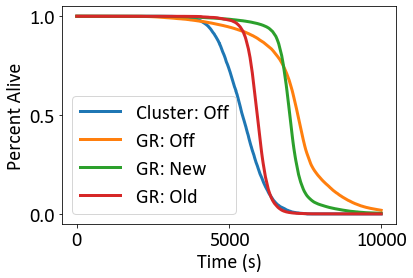

In [88]:
Alive = compareOverTime('Percent Alive', [1,0], {})
generateOverTimeGraphs(Alive, 0, xTicks=[0, 5000, 10000], yTicks=[0,0.5,1])

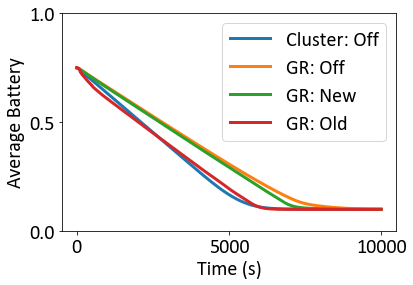

In [90]:
Alive = compareOverTime('Average Battery', [1,0], {})
generateOverTimeGraphs(Alive, 0, xTicks=[0, 5000, 10000], yTicks=[0,0.5,1])

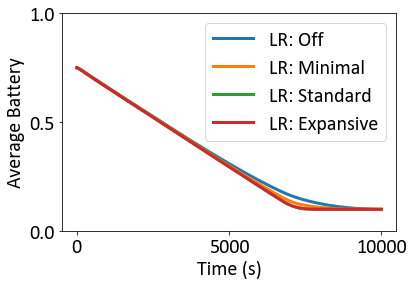

In [102]:
Alive = compareOverTime('Average Battery', [1,2], {1:['false'], 0:[2]})
generateOverTimeGraphs(Alive, 0, xTicks=[0, 5000, 10000], yTicks=[0,0.5,1])

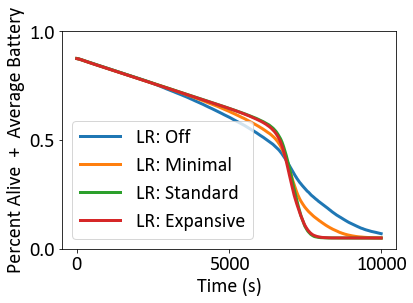

In [103]:
Alive = compareOverTimeAdd(['Percent Alive', 'Average Battery'], [1,2], {1:['false'], 0:[2]})
generateOverTimeGraphs(Alive, 0, xTicks=[0, 5000, 10000], yTicks=[0,0.5,1])

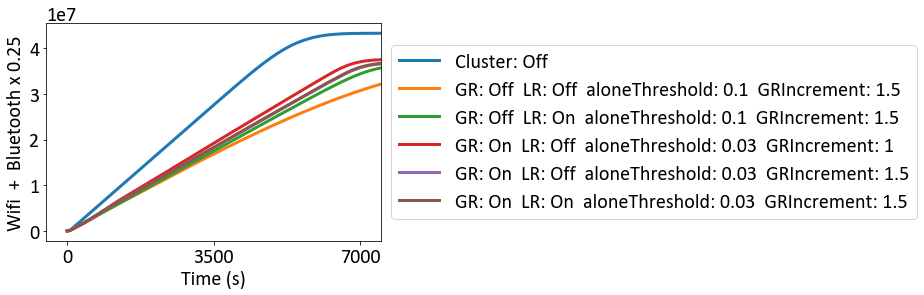

In [103]:
Alive = compareOverTimeAdd({'Wifi':1, 'Bluetooth':0.25}, [0,5,6,1,4], [{1:[0.1], 5:[1,3], 0:['true']}, {5:[3], 1:[0.03]}, {6:[2],4:[1]}])
generateOverTimeGraphs(Alive, 0, xTicks=[0, 3500, 7000], highX=7500)

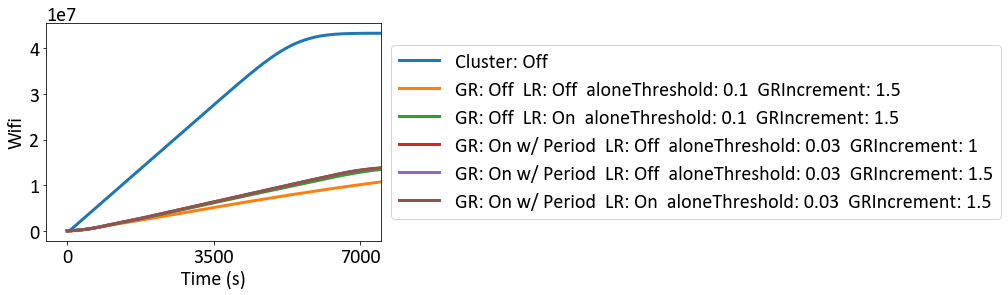

In [86]:
Alive = compareOverTime('Wifi', [0,5,6,1,4], [{1:[0.1], 5:[1,3], 0:['true']}, {5:[1], 1:[0.03]}, {6:[2],4:[1]}])
generateOverTimeGraphs(Alive, 0, xTicks=[0, 3500, 7000], highX=7500)

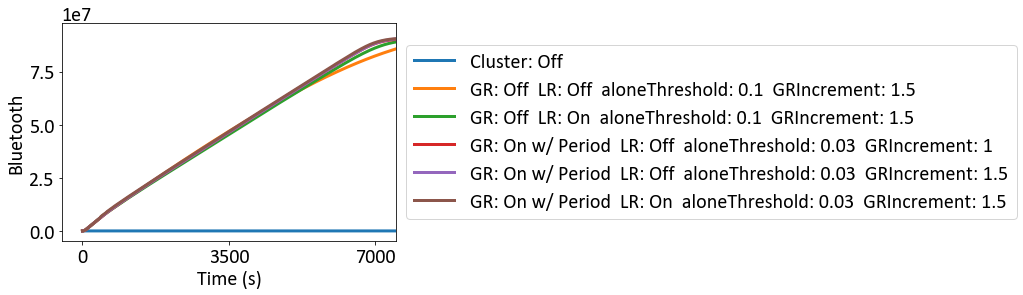

In [87]:
Alive = compareOverTime('Bluetooth', [0,5,6,1,4], [{1:[0.1], 5:[1,3], 0:['true']}, {5:[1], 1:[0.03]}, {6:[2],4:[1]}])
generateOverTimeGraphs(Alive, 0, xTicks=[0, 3500, 7000], highX=7500)